In [2]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [8]:
train = pd.read_csv('/content/train_set.csv')
test = pd.read_csv('/content/test_set.csv')

In [9]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [10]:
train[train['label'] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [12]:
train[train['label'] == 1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [13]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

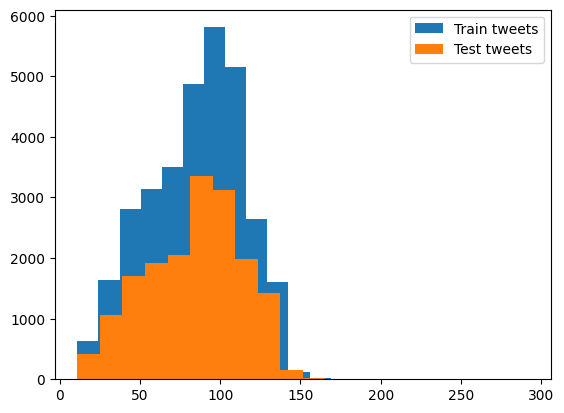

In [14]:
length_train_dataset = train['tweet'].str.len()
length_test_dataset = test['tweet'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend() 
plt.show()

In [15]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

<ipython-input-15-846eabe7f51a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=train.append(test,ignore_index=True) #train and test dataset are combined


(49159, 3)

In [16]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                            

removing twitter handels:

In [17]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") 
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head()

<ipython-input-18-c4cf210b4a30>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


Removing short words (a,is,so etc..):

In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

combine.head()



,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [23]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [24]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet                                  

0                                                [when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run]
1                           [thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank]
2                                                                                                                           [bihday, your, majesti]
3                                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                                                 [factsguid, societi, now, #motiv]
                                                                            ...                                                                    
49154                                            [thought, factori, left, right, polaris, #trump, #uselect, #lea

In [25]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

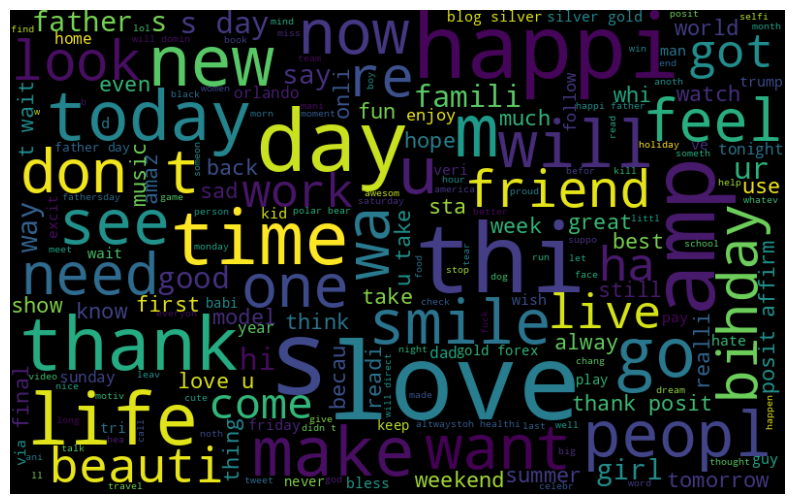

In [26]:
all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#you can see that most words are positive or neutral in above wordcloud.
#now we will plot separate wordclouds for both racist and non-racis/sexist in our data.

---



Separate cloud:

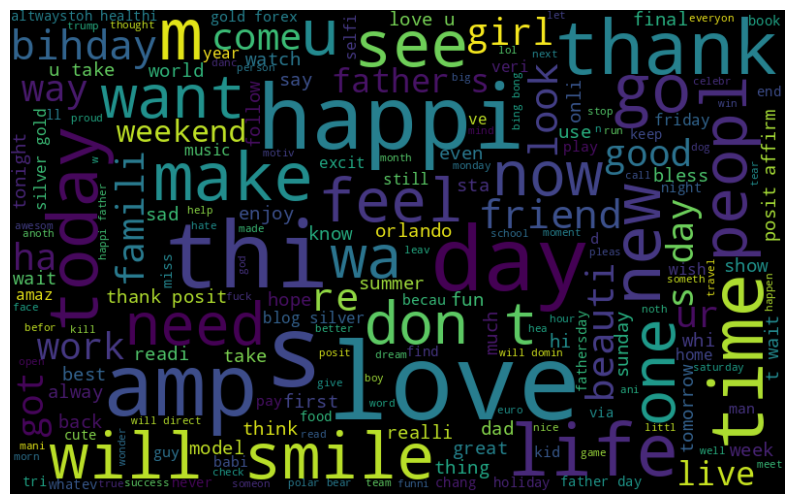

In [27]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

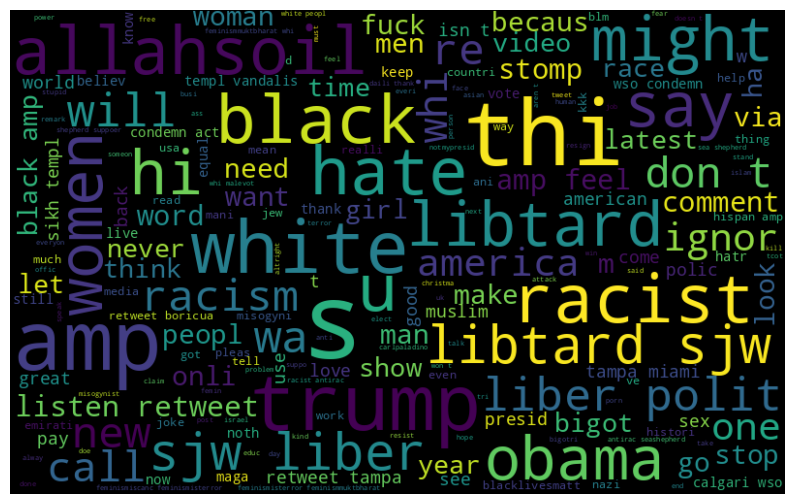

In [28]:
#racist tweet

negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

understanding impact of hashtags on tweet sentiment:

In [31]:
#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [32]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])



In [35]:
#non-racist tweets

nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)

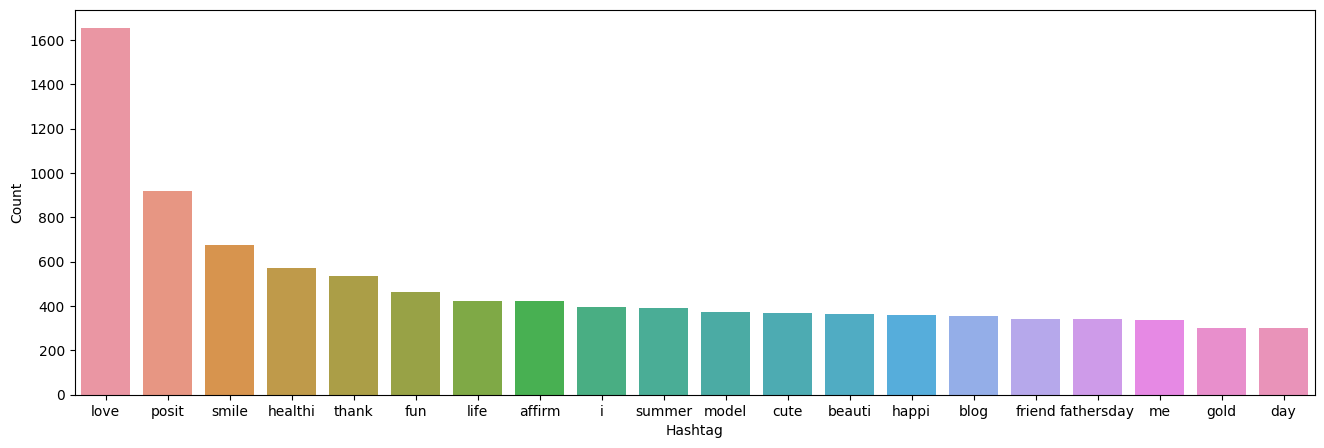

In [36]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

In [38]:
#racist tweets

racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word


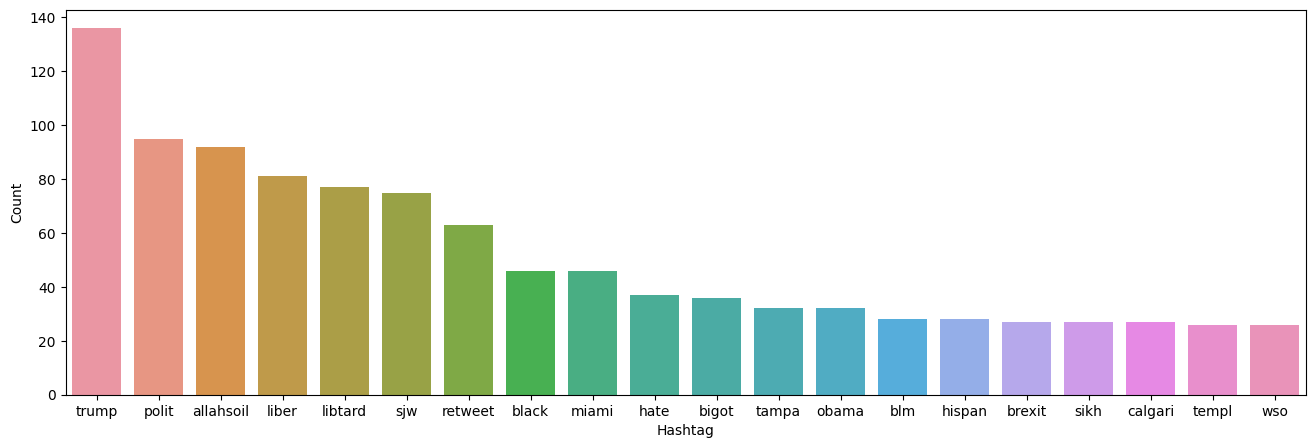

In [39]:
#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()

## Now we will apply assorted techniques like **bag of words(BOW),TF-IDF** for converting data into features

In [40]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

In [42]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(49159, 1000)

In [44]:
# tf_idf
#from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with specified parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Apply TfidfVectorizer to the 'tidy_tweet' column in the 'combine' dataframe
tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])

# Check the shape of the tfidf matrix
print(tfidf.shape)


(49159, 1000)


In [45]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)

print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)



X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)
